# Project: Data Analysis for eBay Car Sales in Germany



## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
</ul>

<a id='intro'></a>
## Introduction

> This project will analyze the vehicle market in Germany. The dataset used in the project was scraped and uploaded to Kaggle https://www.kaggle.com/orgesleka/used-cars-database/data, saved as 'auto_kaggle.csv'.

**The data columns description as following:**
- `dateCrawled` - When this ad was first crawled. All field-values are taken from this date.
- `name` - Name of the car.
- `seller` - Whether the seller is private or a dealer.
- `offerType` - The type of listing
- `price` - The price on the ad to sell the car.
- `abtest` - Whether the listing is included in an A/B test.
- `vehicleType` - The vehicle Type.
- `yearOfRegistration` - The year in which which year the car was first registered.
- `gearbox` - The transmission type.
- `powerPS` - The power of the car in PS.
- `model` - The car model name.
- `kilometer` - How many kilometers the car has driven.
- `monthOfRegistration` - The month in which year the car was first registered.
- `fuelType` - What type of fuel the car uses.
- `brand` - The brand of the car.
- `notRepairedDamage` - If the car has a damage which is not yet repaired.
- `dateCreated` - The date on which the eBay listing was created.
- `nrOfPictures` - The number of pictures in the ad.
- `postalCode` - The postal code for the location of the vehicle.
- `lastSeenOnline` - When the crawler saw this ad last online.

**The project amis to answer the following questions:**
> - Question 1: What is the most common brands of cars in Germany and their listed average prices?
> - Question 2: Among common brands, are there large differences on kilometer that can affect listing price?
> - Question 3: What are the factors that can affect car prices?

<a id='wrangling'></a>
## Data Wrangling

### Step1_1. Initial Data Exploring and drop irrelevant columns and duplicated rows

In [158]:
# Import the libraries we will use
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import pandas as pd
import numpy as np

# Loading data and check information and first 3 rows
autos=pd.read_csv('autos_kaggle.csv', encoding='Latin-1')
autos.info()
autos.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 371528 entries, 0 to 371527
Data columns (total 20 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   dateCrawled          371528 non-null  object
 1   name                 371528 non-null  object
 2   seller               371528 non-null  object
 3   offerType            371528 non-null  object
 4   price                371528 non-null  int64 
 5   abtest               371528 non-null  object
 6   vehicleType          333659 non-null  object
 7   yearOfRegistration   371528 non-null  int64 
 8   gearbox              351319 non-null  object
 9   powerPS              371528 non-null  int64 
 10  model                351044 non-null  object
 11  kilometer            371528 non-null  int64 
 12  monthOfRegistration  371528 non-null  int64 
 13  fuelType             338142 non-null  object
 14  brand                371528 non-null  object
 15  notRepairedDamage    299468 non-nu

,dateCrawled,name,seller,offerType,price,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,model,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage,dateCreated,nrOfPictures,postalCode,lastSeen
0,2016-03-24 11:52:17,Golf_3_1.6,privat,Angebot,480,test,NaN,1993,manuell,0,golf,150000,0,benzin,volkswagen,NaN,2016-03-24 00:00:00,0,70435,2016-04-07 03:16:57
1,2016-03-24 10:58:45,A5_Sportback_2.7_Tdi,privat,Angebot,18300,test,coupe,2011,manuell,190,NaN,125000,5,diesel,audi,ja,2016-03-24 00:00:00,0,66954,2016-04-07 01:46:50
2,2016-03-14 12:52:21,"Jeep_Grand_Cherokee_""Overland""",privat,Angebot,9800,test,suv,2004,automatik,163,grand,125000,8,diesel,jeep,NaN,2016-03-14 00:00:00,0,90480,2016-04-05 12:47:46
3,2016-03-17 16:54:04,GOLF_4_1_4__3TÜRER,privat,Angebot,1500,test,kleinwagen,2001,manuell,75,golf,150000,6,benzin,volkswagen,nein,2016-03-17 00:00:00,0,91074,2016-03-17 17:40:17
4,2016-03-31 17:25:20,Skoda_Fabia_1.4_TDI_PD_Classic,privat,Angebot,3600,test,kleinwagen,2008,manuell,69,fabia,90000,7,diesel,skoda,nein,2016-03-31 00:00:00,0,60437,2016-04-06 10:17:21


**Analysis**

> - Column names need to be changed to be more descriptive and easier to work with. 
> - There are some columns contain null-value data.
> - Some columns may not useful for analysis.
> - Some columns contain non-English words and need to change to English to undertand.

In [159]:
autos.describe(include='all')

,dateCrawled,name,seller,offerType,price,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,model,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage,dateCreated,nrOfPictures,postalCode,lastSeen
count,371528,371528,371528,371528,3.715280e+05,371528,333659,371528.000000,351319,371528.000000,351044,371528.000000,371528.000000,338142,371528,299468,371528,371528.0,371528.00000,371528
unique,280500,233531,2,2,NaN,2,8,NaN,2,NaN,251,NaN,NaN,7,40,2,114,NaN,NaN,182806
top,2016-03-24 14:49:47,Ford_Fiesta,privat,Angebot,NaN,test,limousine,NaN,manuell,NaN,golf,NaN,NaN,benzin,volkswagen,nein,2016-04-03 00:00:00,NaN,NaN,2016-04-06 13:45:54
freq,7,657,371525,371516,NaN,192585,95894,NaN,274214,NaN,30070,NaN,NaN,223857,79640,263182,14450,NaN,NaN,17
mean,NaN,NaN,NaN,NaN,1.729514e+04,NaN,NaN,2004.577997,NaN,115.549477,NaN,125618.688228,5.734445,NaN,NaN,NaN,NaN,0.0,50820.66764,NaN
std,NaN,NaN,NaN,NaN,3.587954e+06,NaN,NaN,92.866598,NaN,192.139578,NaN,40112.337051,3.712412,NaN,NaN,NaN,NaN,0.0,25799.08247,NaN
min,NaN,NaN,NaN,NaN,0.000000e+00,NaN,NaN,1000.000000,NaN,0.000000,NaN,5000.000000,0.000000,NaN,NaN,NaN,NaN,0.0,1067.00000,NaN
25%,NaN,NaN,NaN,NaN,1.150000e+03,NaN,NaN,1999.000000,NaN,70.000000,NaN,125000.000000,3.000000,NaN,NaN,NaN,NaN,0.0,30459.00000,NaN
50%,NaN,NaN,NaN,NaN,2.950000e+03,NaN,NaN,2003.000000,NaN,105.000000,NaN,150000.000000,6.000000,NaN,NaN,NaN,NaN,0.0,49610.00000,NaN
75%,NaN,NaN,NaN,NaN,7.200000e+03,NaN,NaN,2008.000000,NaN,150.000000,NaN,150000.000000,9.000000,NaN,NaN,NaN,NaN,0.0,71546.00000,NaN


**Analysis**:

> - `seller` and `offerType` only have 2 unique value, with more than 370000 frequency;
> - The following columns have *odd max and min value*: 
   `price`
   `yearOfRegistration`
   `powerPS`
   `nrOfPictures`

In [160]:
autos["seller"].value_counts()

privat        371525
gewerblich         3
Name: seller, dtype: int64

In [161]:
autos["offerType"].value_counts()

Angebot    371516
Gesuch         12
Name: offerType, dtype: int64

In [162]:
autos["nrOfPictures"].value_counts()

0    371528
Name: nrOfPictures, dtype: int64

**Analysis:**
>`seller` and `offerType` have most of the values the same; `nrOfPictures`column has 0 for every column; `dateCrawled, abtest, nrOfPictures, monthOfRegistration, postalCode and lastSeen` are irrelevant to our analysis for car price, so we can drop these columns.

In [163]:
#Drop unnecessary columns
drop_col=['seller', 'offerType', 'abtest', 'dateCrawled', 'nrOfPictures', 'monthOfRegistration', 'postalCode','lastSeen',]
autos = autos.drop(drop_col, axis=1)
autos.head(1)

,name,price,vehicleType,yearOfRegistration,gearbox,powerPS,model,kilometer,fuelType,brand,notRepairedDamage,dateCreated
0,Golf_3_1.6,480,NaN,1993,manuell,0,golf,150000,benzin,volkswagen,NaN,2016-03-24 00:00:00


In [164]:
# Find out how many rows are duplicated
sum(autos.duplicated())

3934

In [165]:
# Drop duplicated rows
autos.drop_duplicates(inplace=True)

### Step1_2. Clean Column name

In [166]:
autos.columns

Index(['name', 'price', 'vehicleType', 'yearOfRegistration', 'gearbox',
       'powerPS', 'model', 'kilometer', 'fuelType', 'brand',
       'notRepairedDamage', 'dateCreated'],
      dtype='object')

**Analysis**:
>- Change the columns from camelcase to snakecase.
>- Change a few wordings to more accurately describe the columns.

In [167]:
autos.columns = ['name', 'price', 'vehicle_type', 'registration_year', 'gearbox', 'power_ps', 'model',
       'kilometer','fuel_type', 'brand','unrepaired_damage', 'ad_created']
autos.head(1)

,name,price,vehicle_type,registration_year,gearbox,power_ps,model,kilometer,fuel_type,brand,unrepaired_damage,ad_created
0,Golf_3_1.6,480,NaN,1993,manuell,0,golf,150000,benzin,volkswagen,NaN,2016-03-24 00:00:00


### Step1_3 Investigate the columns (1.'price', 2.'registration_year', 3.'power_ps') that have abnormal values:


**1. Investigate on "price" column**

In [168]:
# Find out max value on price.
autos["price"].max()

2147483647

In [169]:
# Find out min value on price.
autos["price"].min()

0

In [170]:
# # Find out mean value on price.
autos["price"].mean()

17423.379826656583

In [171]:
# Find out how many car prices are under 100
sum(autos["price"]<=100)

14218

In [172]:
# Find out how many car prices are over 200000
sum(autos["price"]>200000)

170

**Analysis:**
> - As ebay is an auction site, it is possible to have listing with opening bid very low, based on common sense, we assume any price under 100 is too low. The amount of cars with price under 100 is less than 4%, so we will remove these rows. 
> - Although it is possible for luxury cars with very high price, we will limit the price within 200000 in our analysis

In [173]:
# Remove the rows with price values under 100 and above 200000
autos=autos[autos['price'].between(100,200000)]

In [174]:
autos["registration_year"].sample(10)

315827    2001
33420     2003
332314    2002
182304    1998
318550    2017
121683    2018
168604    2008
257738    2012
289654    2003
74484     1997
Name: registration_year, dtype: int64

**2. Investigate on 'registration_year' column**

In [175]:
# Find out the extreme small value with percentage
autos["registration_year"].value_counts(normalize=True).sample(20)

1996    0.028857
2006    0.055545
1911    0.000003
1964    0.000215
8200    0.000003
1933    0.000011
1997    0.038912
1970    0.000821
9999    0.000037
1979    0.000824
2000    0.063639
1999    0.061366
5900    0.000003
1600    0.000006
1977    0.000522
2008    0.044465
6000    0.000017
2010    0.034127
4500    0.000006
1400    0.000003
Name: registration_year, dtype: float64

**Analysis:**
>- There are some listings with extremely small and large registration years, but the percentage is small. Based on common sense, we will cut the registration year by 1950.
>- We will use the year of the 'ad_created' as the threshold year for the highes values for registration_year because the car can be be listed on sale before it's registered.

In [176]:
# We can also use the following method to find out the sales year
(autos["ad_created"]
        .str[:4]
        .value_counts(normalize=True, dropna=False)
        .sort_index()
        )

2014    0.000003
2015    0.000082
2016    0.999915
Name: ad_created, dtype: float64

**Analysis:**
>- Most of the cars in this dataset are for sale in 2016

In [177]:
# The percentage of our data that has unrealistic values in this column
(~autos['registration_year'].between(1950,2016)).sum()/autos.shape[0]

0.03932700043756263

In [178]:
# As the number ablove is below 4%, we will remove rows with value below 1900 and above 2016 
autos=autos[autos['registration_year'].between(1950,2016)]

In [179]:
# Since we have found out most of the list are in 2016, this is unrelated information with car price analysis;
# We can drop this columns.
autos.drop('ad_created', axis=1,inplace=True)

**3. Investigate on 'power_ps' column and do the same analysis and remove the rows with unrealistic values**

In [180]:
autos=autos[autos['power_ps'].between(10,500)]

### Step1_ 4 Change the values in the columns ( 1. gearbox, 2. 'unrepaired_damage')  which have only 2 unique values and are not in English 

**1.'gearbox'**

In [181]:
autos.gearbox.value_counts()

manuell      234790
automatik     68014
Name: gearbox, dtype: int64

In [182]:
mapping_dict2={'manuell':'manual', 'automatik':'automatic'}
autos['gearbox']=autos['gearbox'].map(mapping_dict2)
autos['gearbox'].value_counts()

manual       234790
automatic     68014
Name: gearbox, dtype: int64

**2.'unrepaired_damage'**

In [183]:
autos.unrepaired_damage.value_counts()

nein    236880
ja       28535
Name: unrepaired_damage, dtype: int64

In [184]:
mapping_dict4={'nein':'no', 'ja':'yes'}
autos['unrepaired_damage']=autos['unrepaired_damage'].map(mapping_dict4)
autos['unrepaired_damage'].value_counts()

no     236880
yes     28535
Name: unrepaired_damage, dtype: int64

### Step1_ 5 Investigate Null-values

In [185]:
autos.isnull().sum()

name                     0
price                    0
vehicle_type         10865
registration_year        0
gearbox               5287
power_ps                 0
model                11401
kilometer                0
fuel_type            15427
brand                    0
unrepaired_damage    42676
dtype: int64

**Analysis**
>- The columns with null-values are all text or boolean values, it is possible for not having complete informations in eBay, and as our focus is to analyze car 'price', we don't need to remove or fill these null values.

In [186]:
# Check our changes
autos.describe(include='all')

,name,price,vehicle_type,registration_year,gearbox,power_ps,model,kilometer,fuel_type,brand,unrepaired_damage
count,308091,308091.000000,297226,308091.000000,302804,308091.000000,296690,308091.000000,292664,308091,265415
unique,189335,NaN,8,NaN,2,NaN,250,NaN,7,40,2
top,BMW_318i,NaN,limousine,NaN,manual,NaN,golf,NaN,benzin,volkswagen,no
freq,616,NaN,86080,NaN,234790,NaN,25146,NaN,192086,65692,236880
mean,NaN,6235.856159,NaN,2003.163111,NaN,125.982057,NaN,125434.514478,NaN,NaN,NaN
std,NaN,8237.962950,NaN,6.789303,NaN,60.082235,NaN,39264.801012,NaN,NaN,NaN
min,NaN,100.000000,NaN,1950.000000,NaN,10.000000,NaN,5000.000000,NaN,NaN,NaN
25%,NaN,1450.000000,NaN,1999.000000,NaN,80.000000,NaN,100000.000000,NaN,NaN,NaN
50%,NaN,3500.000000,NaN,2003.000000,NaN,116.000000,NaN,150000.000000,NaN,NaN,NaN
75%,NaN,7999.000000,NaN,2008.000000,NaN,150.000000,NaN,150000.000000,NaN,NaN,NaN


<a id='eda'></a>
## Exploratory Data Analysis

### Question 1: What are the common brands of vehicls in Germany and their average price ?

In [187]:
# List of top 10 most popular brands 
brand_counts=autos['brand'].value_counts(normalize=True)
brand_counts.head(10)

volkswagen       0.213223
bmw              0.113379
opel             0.104498
mercedes_benz    0.097247
audi             0.092366
ford             0.067399
renault          0.044798
peugeot          0.030251
fiat             0.024700
seat             0.019183
Name: brand, dtype: float64

Text(0, 0.5, 'proportion in the market')

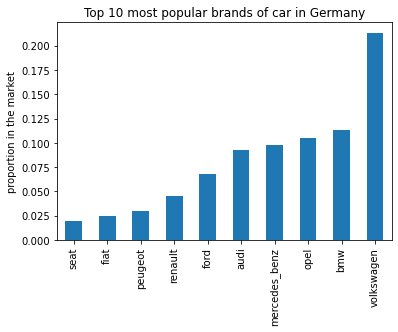

In [188]:
brand_counts.head(10).sort_values().plot(kind='bar', title='Top 10 most popular brands of car in Germany')
plt.ylabel('proportion in the market')

**Analysis**
>- Volkswagen is the most polular choice, counting more than 20% of the market
>- BMW, Opel, mercedes_benz and audi are the next popular one, but far from volkswagen's popularity

In [189]:
# Select the brands that are more than 5% of the market to analyze
common_brands=brand_counts[brand_counts > .05].index
common_brands

Index(['volkswagen', 'bmw', 'opel', 'mercedes_benz', 'audi', 'ford'], dtype='object')

In [191]:
#Analyze the common brands and its average price
brand_mean_prices = {}

for brand in common_brands:
    brand_only = autos[autos["brand"] == brand]
    mean_price = brand_only["price"].mean()
    brand_mean_prices[brand] = int(mean_price)

brand_mean_prices

{'volkswagen': 5687,
 'bmw': 8680,
 'opel': 3174,
 'mercedes_benz': 8660,
 'audi': 9381,
 'ford': 3932}

In [195]:
# Convert the dictionary to a pandas series and sort its value
mean_prices=pd.Series(brand_mean_prices).sort_values(ascending=False)
mean_prices

audi             9381
bmw              8680
mercedes_benz    8660
volkswagen       5687
ford             3932
opel             3174
dtype: int64

Text(0, 0.5, 'price')

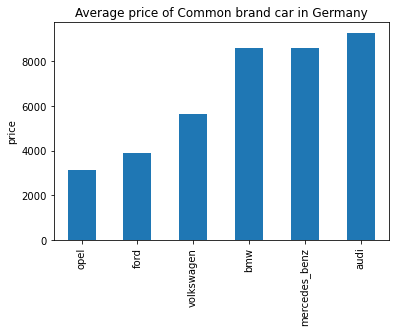

In [107]:
mean_prices.sort_values().plot(kind='bar', title='Average price of Common brand car in Germany')
plt.ylabel('price')

### Answer 1:###  

>- Volkswagen is the most popular brand, followed by Opel,BMW, Mercedes, Audi and Ford.
>- Among these popular brands, Audi is the most expensive, average price is 9381 dollars, followed by 8680 for BMW and 8664 for Mercedes. Volkswagen is more affordable ofr most people, average price is 5688. Ford and Opel are least expensive with average price under 4000.

### Question 2: Among common brands,  are there large differences on kilometer that can affect listing price?

In [196]:
#Analyze the common brands and its average odometer_km
brand_mean_km = {}

for brand in common_brands:
    brand_only = autos[autos["brand"] == brand]
    mean_km = brand_only["kilometer"].mean()
    brand_mean_km[brand] = int(mean_km)

brand_mean_km

{'volkswagen': 128118,
 'bmw': 133003,
 'opel': 128390,
 'mercedes_benz': 130817,
 'audi': 129147,
 'ford': 123600}

In [197]:
# Convert the dictionary to a pandas series 
mean_km=pd.Series(brand_mean_km)

In [198]:
# Convert pandas series to a data frame 
common_brand_info=pd.DataFrame(mean_prices, columns=['mean_price'])

In [199]:
# Add the 'mean_km' to the data frame
common_brand_info['mean_km']=mean_km
common_brand_info

,mean_price,mean_km
audi,9381,129147
bmw,8680,133003
mercedes_benz,8660,130817
volkswagen,5687,128118
ford,3932,123600
opel,3174,128390


Text(0, 0.5, 'price')

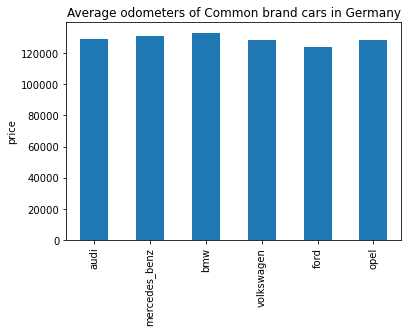

In [118]:
common_brand_info['mean_km'].plot(kind='bar', title='Average odometers of Common brand cars in Germany')
plt.ylabel('price')

### Answer 2:###

>- Among these common brands of cars on sale, the average of odometers are all ablove 100000km; The range of car mileages does not vary as much as the prices do by brand.

### Question 3: What are the factors that affect car price?

### Q3_Step1: First we will analyze the columns with numerical value and see how it is correlated with the car price using correlation heatmap and scatter chart.

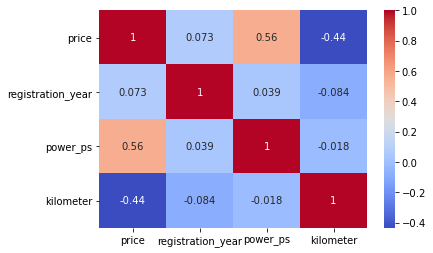

In [122]:
# plot correlation heatmap
sns.heatmap(autos.corr(),annot=True,cmap='coolwarm')

**Analysis**
>- Prices are positively correlated with power_ps and registration_year. Power_ps has stronger correlation.
>- Prices are negatively correlated with kilometer.

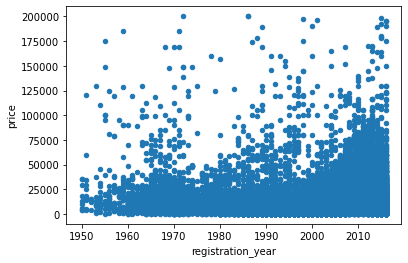

In [200]:
# plot scatter chart to check the relation between 'registration_year' and 'price'
autos.plot(kind='scatter', x='registration_year', y='price',)

**Analysis**
>- In general, the newer the cars, the higher the prices, but for a given registration year, there are still huge gap on prices

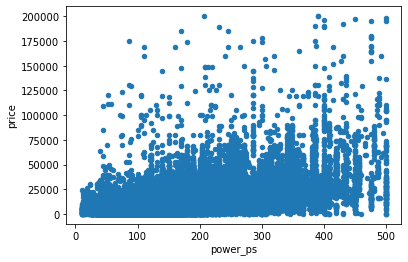

In [125]:
# plot scatter chart to check the relation between 'power_ps' and 'price'
autos.plot(kind='scatter', x='power_ps', y='price')

**Analysis**
>- Most cars have pow_ps under 400, and in general the higher the power_ps, the higher the price; but there are cars with extremely high power_ps, but prices range is still very large. 

### Q3_Step2: We will analyze the columns with catergorical string values using bar chart.

**1.'vehicle_type'**

Text(0, 0.5, 'price')

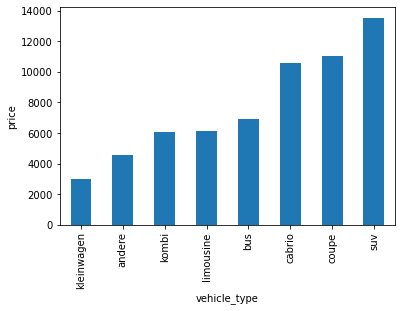

In [127]:
type_price=autos.groupby('vehicle_type').mean()['price']
type_price.sort_values().plot(kind='bar')

plt.ylabel('price')

**Analyze**
>- As we can see, suv is the most expensive ones, and kleinwagen the lease expensive. 

**2.'gearbox'**

Text(0, 0.5, 'price')

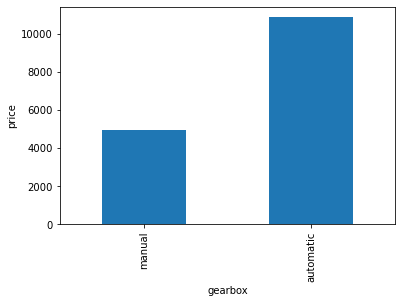

In [203]:
# Analyze whether the damege is repaired can positively influnce the price
gearbox_price=autos.groupby('gearbox')['price'].mean()
gearbox_price.sort_values().plot(kind='bar')

plt.ylabel('price')

**Analysis**
>- In general, automatic cars are more expensive

**3.'fuel_type'**

Text(0, 0.5, 'price')

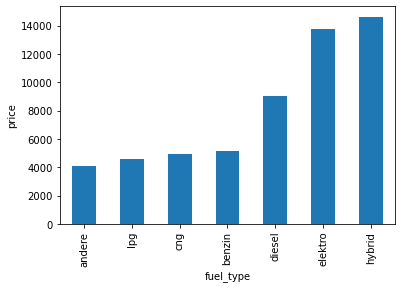

In [204]:
fuel_price=autos.groupby('fuel_type').mean()['price']
fuel_price.sort_values().plot(kind='bar')

plt.ylabel('price')

**Analysis**
>- hybrid are most expensive one and tightlt followed by elektro, diesel and benzin.

**4.'unrepaired_damage'**

Text(0, 0.5, 'price')

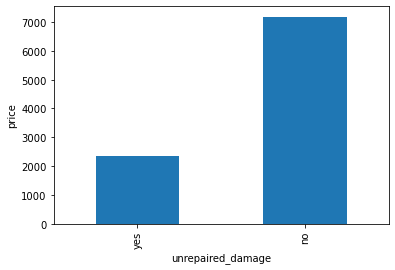

In [205]:
# Analyze whether the damege is repaired can positively influnce the price
unrepaired_price=autos.groupby('unrepaired_damage')['price'].mean()
unrepaired_price.sort_values().plot(kind='bar')

plt.ylabel('price')

**Analysis**
>- In general, when the demage is repaired, the car prices are higher

**5.'brand'**

Text(0, 0.5, 'price')

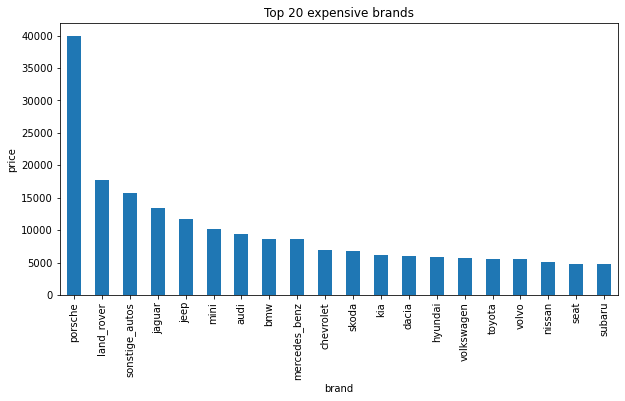

In [206]:
top_20_expensive=autos.groupby('brand').mean().sort_values('price',ascending=False).head(20)
top_20_expensive['price'].plot(kind='bar',title='Top 20 expensive brands', figsize=(10, 5))

plt.ylabel('price')

**Analysis**
>- Porsche is the most expensive brand, the average price double the following competitor 'land_rover'. 
>- The top 6 most expensive brands are all not the most common brands. The most popular brand volkswagen has very affordable average price.

### Q3_Step4: Let's analyze the most popular brand 'volkswagen', and see how car model and car name length can affect prices

In [132]:
# Selet the rows that are volkswagen for analyze
volkswagen=autos[autos['brand']=='volkswagen']
volkswagen.describe(include='all')

,name,price,vehicle_type,registration_year,gearbox,power_ps,model,kilometer,fuel_type,brand,unrepaired_damage
count,68543,68543.000000,62555,68543.000000,67192,68543.000000,66254,68543.000000,63965,68543,56993
unique,43359,NaN,8,NaN,2,NaN,22,NaN,7,1,2
top,Volkswagen_Golf_1.4,NaN,limousine,NaN,manual,NaN,golf,NaN,benzin,volkswagen,no
freq,573,NaN,18529,NaN,57757,NaN,26439,NaN,38855,68543,51228
mean,NaN,5617.710736,NaN,2003.684125,NaN,106.034971,NaN,128356.360241,NaN,NaN,NaN
std,NaN,6358.173043,NaN,42.871349,NaN,45.187087,NaN,38318.661595,NaN,NaN,NaN
min,NaN,100.000000,NaN,1000.000000,NaN,10.000000,NaN,5000.000000,NaN,NaN,NaN
25%,NaN,1399.000000,NaN,1998.000000,NaN,75.000000,NaN,125000.000000,NaN,NaN,NaN
50%,NaN,3299.000000,NaN,2003.000000,NaN,101.000000,NaN,150000.000000,NaN,NaN,NaN
75%,NaN,7699.000000,NaN,2009.000000,NaN,131.000000,NaN,150000.000000,NaN,NaN,NaN


In [207]:
# Add a new columns for the name length
volkswagen['name_length']=volkswagen['name'].apply(len)
volkswagen[['price','name_length']].corr()

,price,name_length
price,1.000000,0.289035
name_length,0.289035,1.000000


In [208]:
volkswagen

,name,price,vehicle_type,registration_year,gearbox,power_ps,model,kilometer,fuel_type,brand,unrepaired_damage,name_length
3,GOLF_4_1_4__3TÜRER,1500,kleinwagen,2001,manual,75,golf,150000,benzin,volkswagen,no,18
9,VW_Golf_4_5_tuerig_zu_verkaufen_mit_Anhaengerk...,999,kleinwagen,1998,manual,101,golf,150000,NaN,volkswagen,NaN,53
11,Volkswagen_Passat_Variant_2.0_TDI_Comfortline,2799,kombi,2005,manual,140,passat,150000,diesel,volkswagen,yes,45
12,"VW_Passat_Facelift_35i__""7Sitzer""",999,kombi,1995,manual,115,passat,150000,benzin,volkswagen,NaN,33
13,VW_PASSAT_1.9_TDI_131_PS_LEDER,2500,kombi,2004,manual,131,passat,150000,NaN,volkswagen,no,30
...,...,...,...,...,...,...,...,...,...,...,...,...
371509,LT_35_DIESEL_Gruene_Plakette....letzte_Gelegen...,1900,NaN,2000,manual,110,NaN,150000,NaN,volkswagen,no,50
371516,Volkswagen_Lupo_1.0,1490,kleinwagen,1998,manual,50,lupo,150000,benzin,volkswagen,no,19
371517,Volkswagen_Golf_2.0_TDI_DPF_Team,7900,limousine,2010,manual,140,golf,150000,diesel,volkswagen,no,32
371525,Volkswagen_Multivan_T4_TDI_7DC_UY2,9200,bus,1996,manual,102,transporter,150000,diesel,volkswagen,no,34


**Analysis**
>- name_lenth is positively correlated with price, as the longer the name is, the more features are added, so the price is higher, but the correlation is not strong.

Text(0, 0.5, 'price')

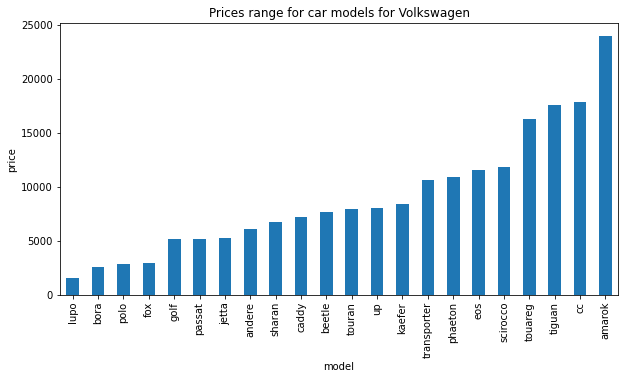

In [134]:
model_price=volkswagen.groupby('model')['price'].mean()
model_price.sort_values().plot(kind='bar',figsize=(10,5), title='Prices range for car models for Volkswagen')

plt.ylabel('price')

**Analysis**
>- There are huge price gap on different car model. For volkswagen, amorok is the most expensive ones, and lupo the least expensive one.

### Answer 3: 
> - From the correlation heatmap and scatter chart, we can conclude `price` are positively correlated with `power_ps` and `registration_year` and are negatively correlated with `kilometer` in general, and `power_ps` is has stronger influence.
> - The other strong catagorical factors that affect the car price are the brand and whether the damage is repaired or not; Also automic are much mroe expensive than manual
> - vehicle_type and fuel_type have strong effects too
> - By analyzing data for volkswagen, the most common brand in Germany, we can see the above conclusions are consistent for specific car brand. And for the same brand, different models have high price ranges too. 